In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

In [5]:
from matplotlib import gridspec

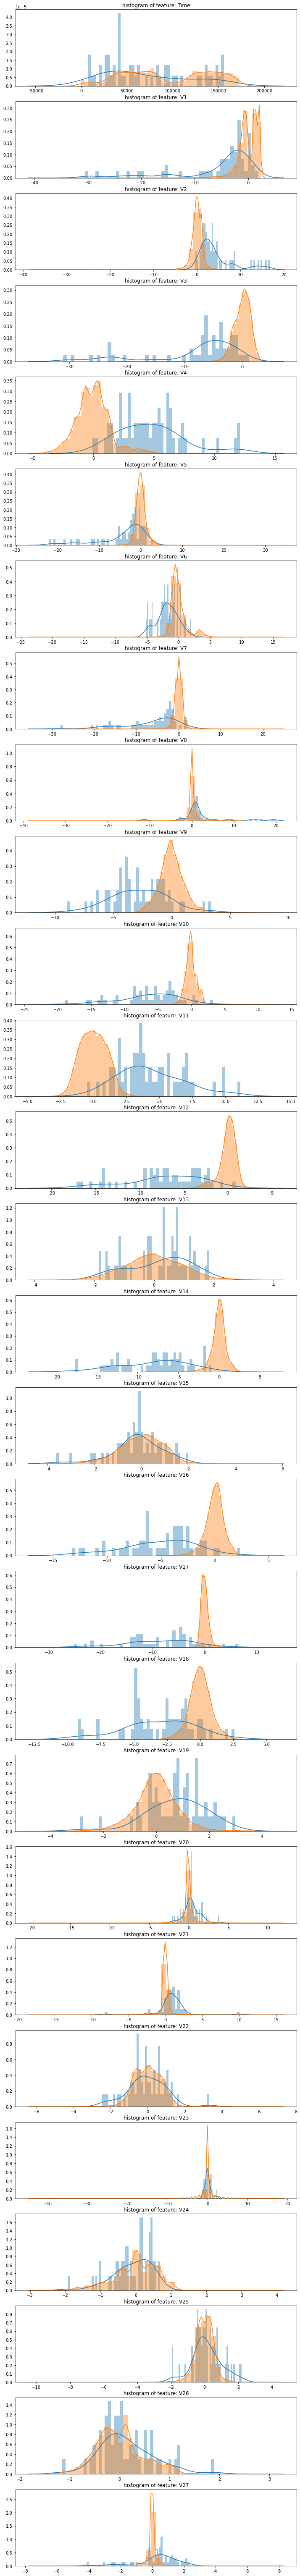

In [6]:
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50)
 sns.distplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [7]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0019700967458223394
Fraud Cases: 56
Valid Transactions: 28425


There is only small fraction fraudulent transaction out all the transactions. The data is highly Unbalanced.  
First apply our models without balancing it.  
If we don’t get a good accuracy then have to balance this dataset.

In [8]:
print('Amount details of fraudulent transaction')
Fraud.Amount.describe()

Amount details of fraudulent transaction


count     56.000000
mean      91.449464
std      164.524448
min        0.000000
25%        1.000000
50%       18.520000
75%      109.307500
max      996.270000
Name: Amount, dtype: float64

In [9]:
print('details of valid transaction')
Valid.Amount.describe()

details of valid transaction


count    28425.000000
mean        88.572094
std        234.229021
min          0.000000
25%          5.980000
50%         21.990000
75%         77.000000
max       6000.000000
Name: Amount, dtype: float64

#### Correlation Matrix

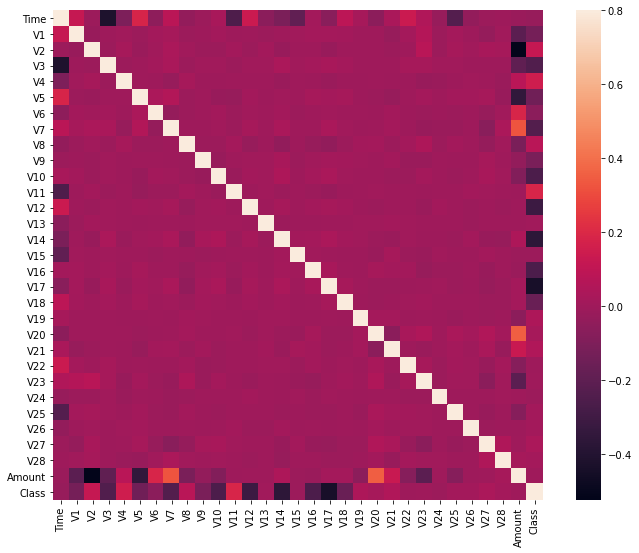

In [10]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [11]:
X=data.drop(['Class'], axis=1)
Y=data['Class']

print(X.shape)
print(Y.shape)

X_data=X.values
Y_data=Y.values

(28481, 30)
(28481,)


#### Using Skicit-learn to split data into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

#### Building another model/classifier ISOLATION FOREST

In [13]:
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),
 contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

#### Reshape the prediction values to 0 for valid, 1 for fraud.

In [14]:
 y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Printing the Confusion matrix

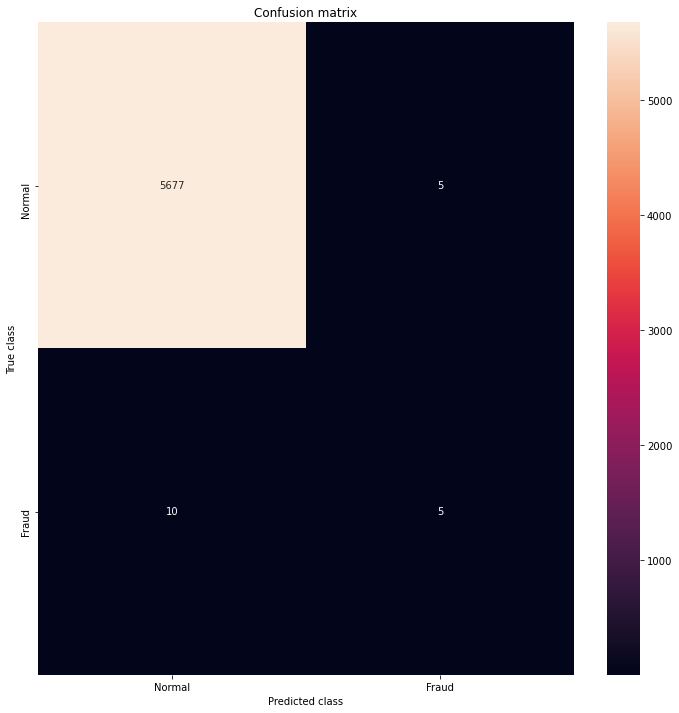

In [16]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Evaluation of the model

In [17]:
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
print('the Model used is {}'.format('Isolation Forest'))
acc= accuracy_score(Y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(Y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(Y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(Y_test,y_pred)
print('The F1-Score is {}'.format(f1))

the Model used is Isolation Forest
The accuracy is 0.9973670352817272
The precision is 0.5
The recall is 0.3333333333333333
The F1-Score is 0.4


this model is not doing as great as expected, so let’s build some other model to get a better result

#### Building the Random Forest Classifier (RANDOM FOREST)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

In [19]:
n_errors = (y_pred != Y_test).sum()
n_outliers = len(Fraud)
print('the Model used is {}'.format('Isolation Forest'))
acc= accuracy_score(Y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(Y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(Y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(Y_test,y_pred)
print('The F1-Score is {}'.format(f1))

the Model used is Isolation Forest
The accuracy is 0.9992978760751272
The precision is 1.0
The recall is 0.7333333333333333
The F1-Score is 0.846153846153846


#### Printing the confusion matrix

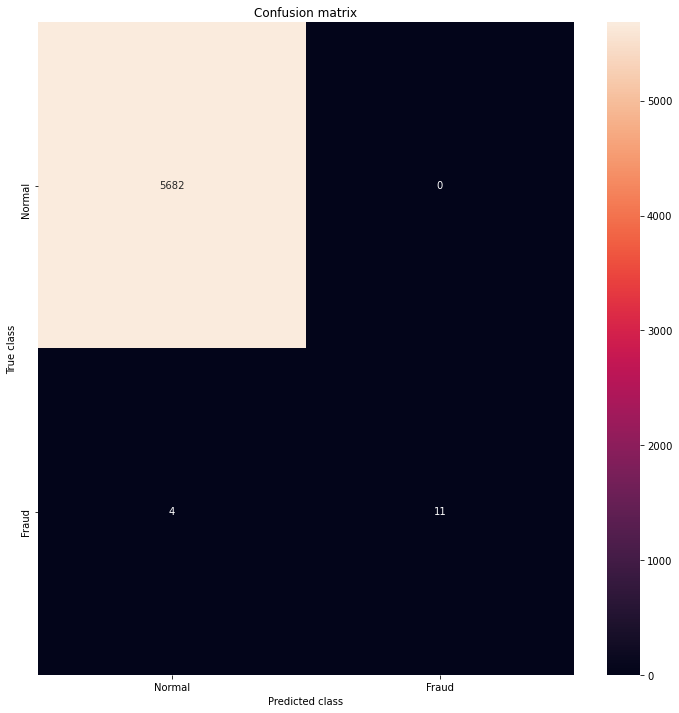

In [20]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Visualizing the Random tree

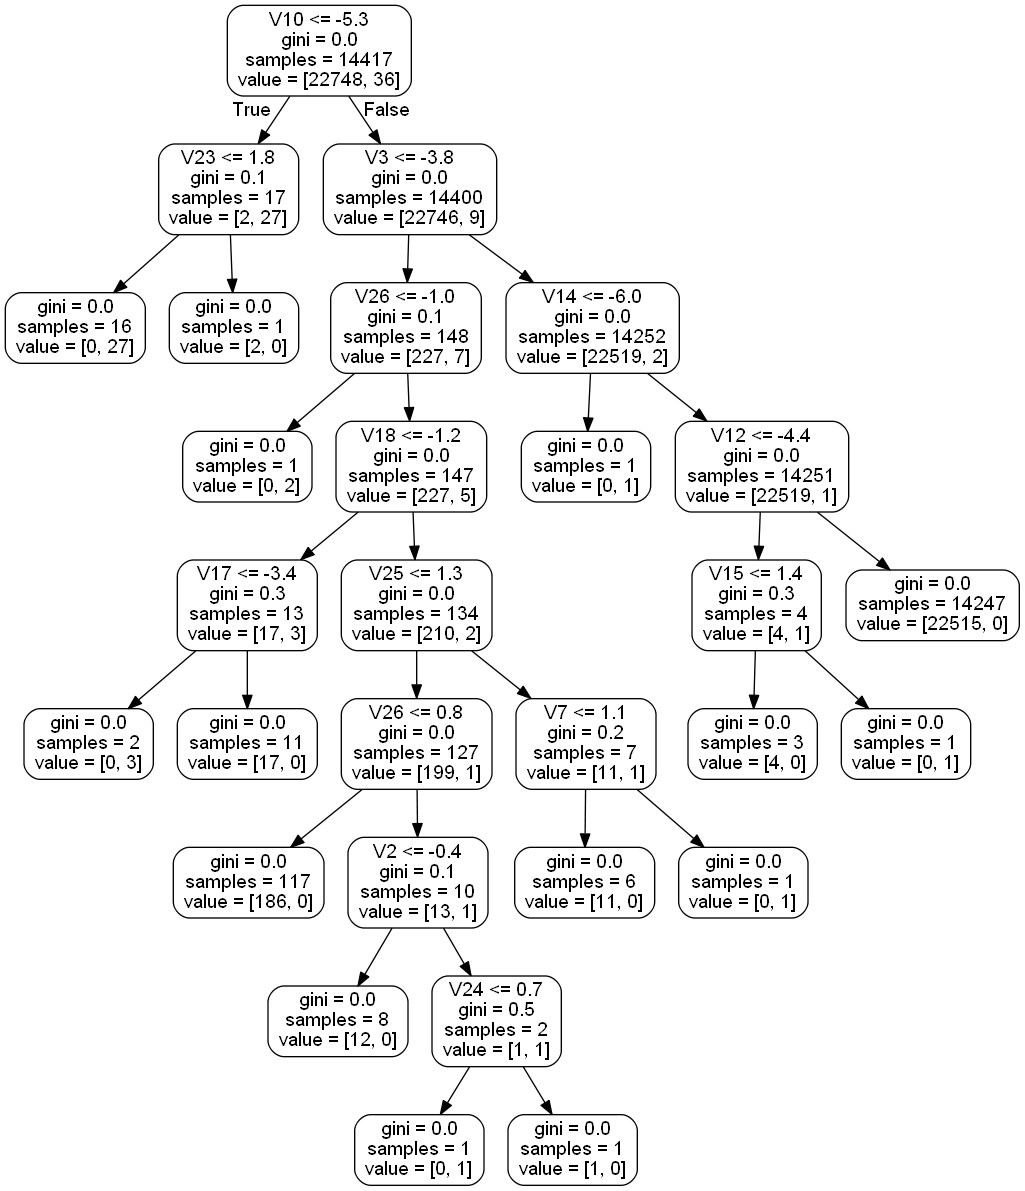

In [21]:
 feature_list = list(X.columns)
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
display(Image(graph.create_png()))